<a href="https://colab.research.google.com/github/DanaW-HIT/CarPricePredictor/blob/main/DataScience_Dana_Wainshtein_207915158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libreries:

In [1]:
## Importing libreries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
%matplotlib inline

Data Exploration:

In [2]:
df = pd.read_csv("train-data.csv") 
df['Engine'] = df['Engine'].str.strip(" CC")
df['Mileage'] =  df['Mileage'].str.strip(" kmpl").str.strip(' km/kg')
df['Power'] = df['Power'].str.strip(" bhp").str.replace('null', '0')
df = df.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price', 'Unnamed: 0'], axis=1)
df['Mileage'] = df.Mileage.astype(float)
df['Engine'] = df.Engine.astype(float)
df['Power'] = df.Power.astype(float)

Graph Making:

Text(0.5, 0, 'Price')

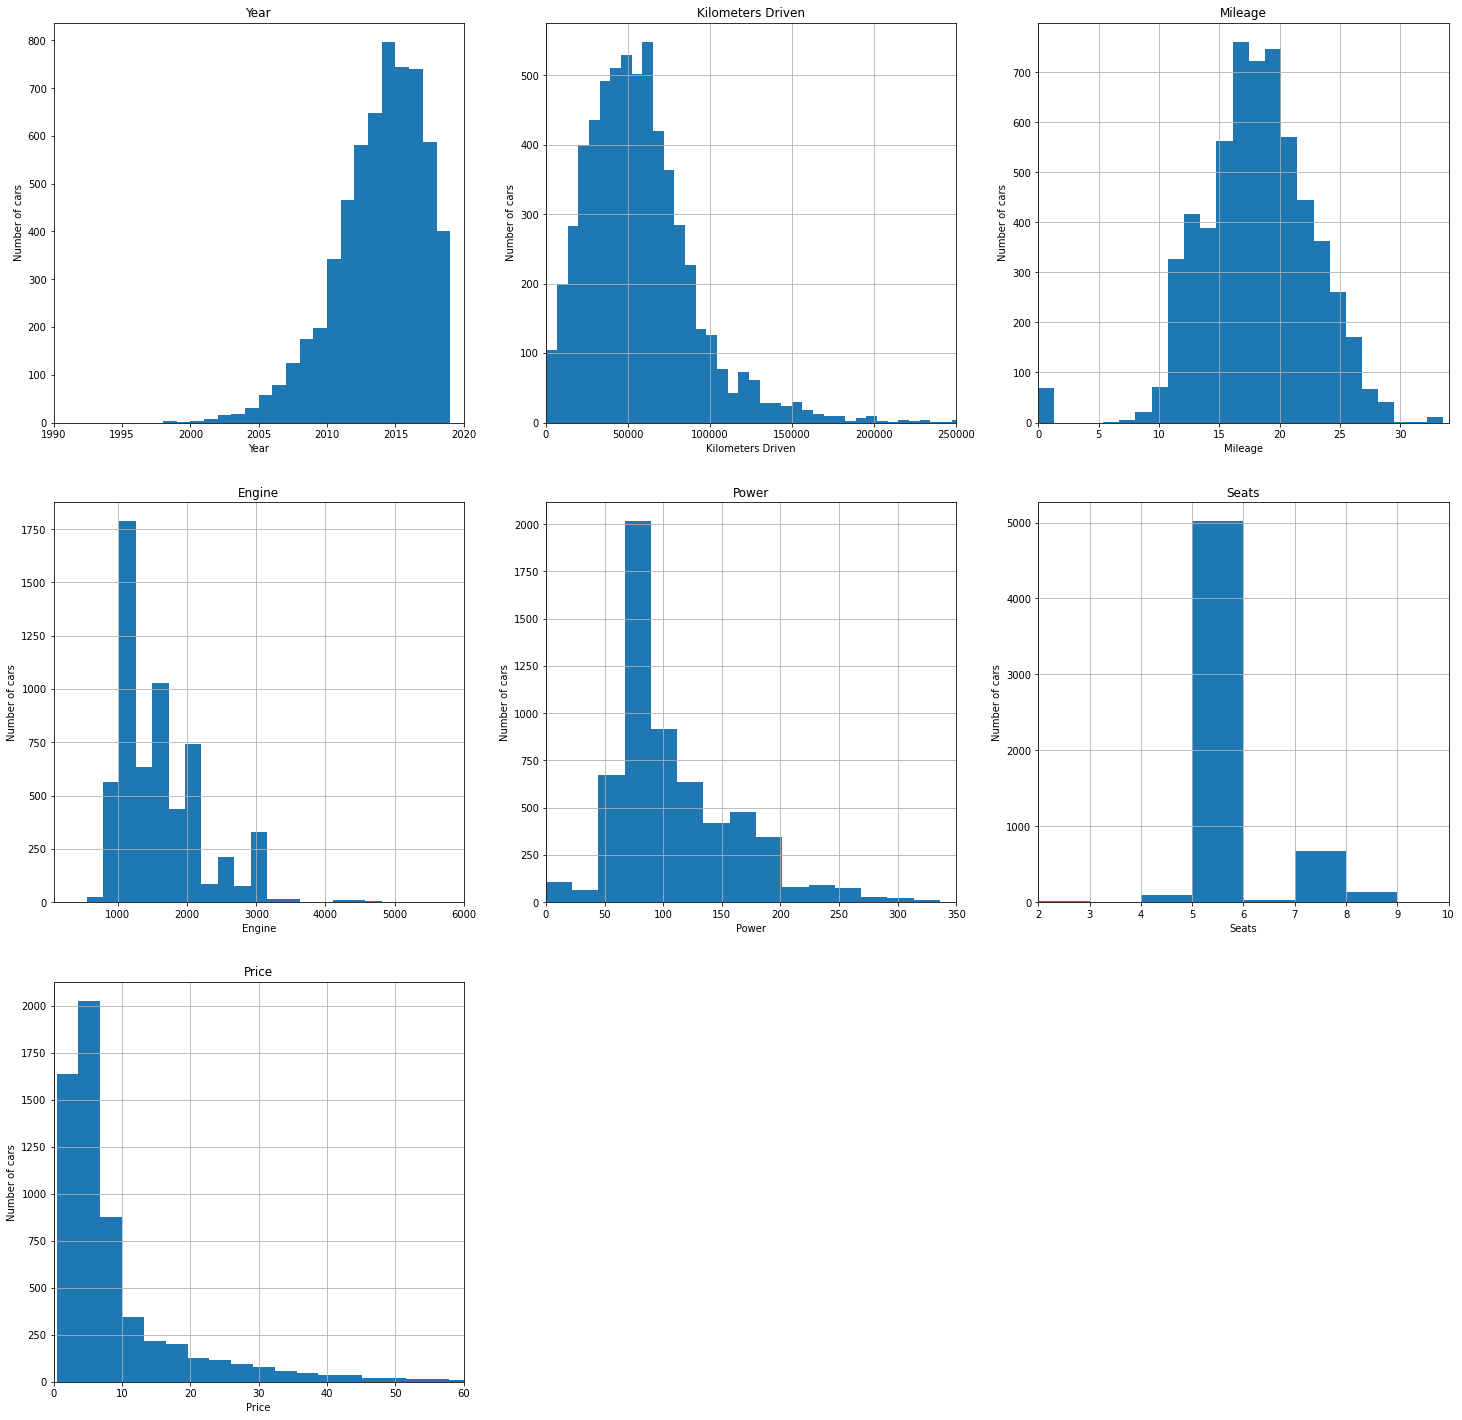

In [3]:
## Graphs:
plt.figure(figsize=(25,25))
## Year:
plt.grid(True)
plt.subplot(331)
axes = plt.gca()
axes.set_xlim([1990,2020]) 
plt.hist(df['Year'], bins=21)
plt.title('Year')
plt.ylabel('Number of cars')
plt.xlabel('Year')
## Kilometers driven:
plt.subplot(332)
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,250000]) #we can say that there's allmost zero cars that drove mmore then 250000 km
plt.hist(df['Kilometers_Driven'], bins=1000)
plt.title('Kilometers Driven')
plt.ylabel('Number of cars')
plt.xlabel('Kilometers Driven')
## Mileage:
plt.subplot(333)
plt.grid(True)
plt.hist(df['Mileage'], bins=25)
axes = plt.gca()
axes.set_xlim([0,34]) 
plt.title('Mileage')
plt.ylabel('Number of cars')
plt.xlabel('Mileage')
## Engine:
plt.subplot(334)
plt.grid(True)
plt.hist(df['Engine'], bins=25)
axes = plt.gca()
axes.set_xlim([70,6000]) 
plt.title('Engine')
plt.ylabel('Number of cars')
plt.xlabel('Engine')
## Power:
plt.subplot(335)
plt.grid(True)
plt.hist(df['Power'], bins=25)
axes = plt.gca()
axes.set_xlim([0,350]) 
plt.title('Power')
plt.ylabel('Number of cars')
plt.xlabel('Power')
## Seats:
plt.subplot(336)
plt.grid(True)
plt.hist(df['Seats'], bins=10)
axes = plt.gca()
axes.set_xlim([2,10]) 
plt.title('Seats')
plt.ylabel('Number of cars')
plt.xlabel('Seats')
## Price:
plt.subplot(337)
plt.grid(True)
plt.hist(df['Price'], bins=50)
axes = plt.gca()
axes.set_xlim([0,60]) 
plt.title('Price')
plt.ylabel('Number of cars')
plt.xlabel('Price')

Box plot:

Text(0.5, 1.0, 'Box plot  of normalization')

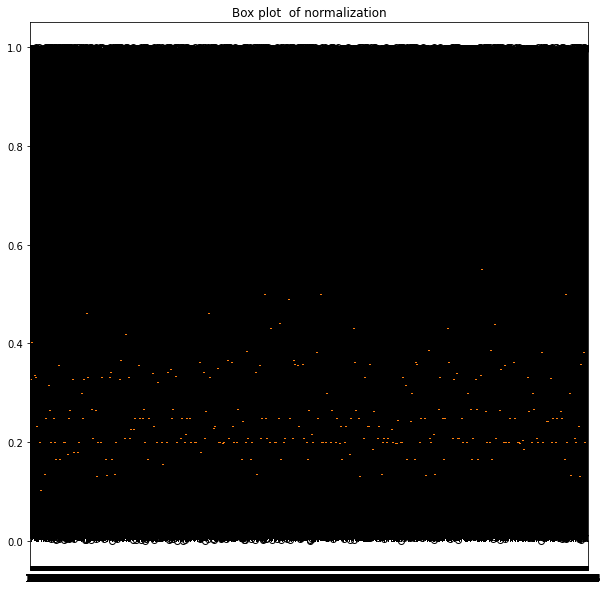

In [4]:
maximum = df.max()
Ndf = df / maximum
plt.figure(figsize=(10,10))
plt.boxplot(Ndf)
plt.title('Box plot  of normalization')

Finding Nan precentege:

In [5]:
## Finding nan percentege
df1 = df.shape[0]
df = df.dropna()
df2 = df.shape[0]
na = df1 - df2
napercent = (na * 100)/ df1
if napercent < 1:
    print("The precentege of nan values is lower then 1")
else:
    print("The precentege of nan values is: ", napercent)

The precentege of nan values is lower then 1


Corr Matrix Creation:

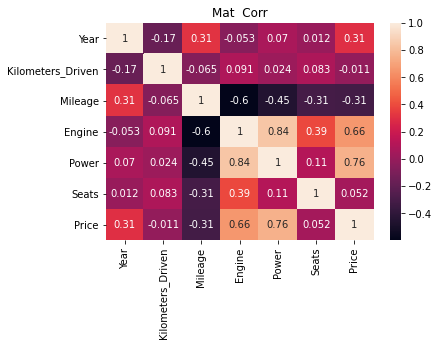

In [6]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Mat  Corr')
plt.show()

KNN Finding Optimal K:

In [1]:
y = df['Price']
x = df.drop(['Price'], axis = 1)
sc_X = StandardScaler()
x = sc_X.fit_transform(x)
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
error_rate = []
for i in range(1,1000):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,1000), error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate),"at K =", error_rate.index(min(error_rate)))

NameError: ignored

Hold Out Cross validation:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='euclidean')
knn.fit(X_train, y_train)
pred_y = knn.predict(X_test)
MSE = metrics.mean_squared_error(y_test, pred_y)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ", RMSE)

KNN LeaveOneOut

In [ ]:
cv = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='euclidean')
scores = cross_val_score(knn, x, y, scoring='neg_root_mean_squared_error', cv=cv) * (-1)
print(scores)cv = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='euclidean')
knn.fit(X_train, y_train)
scores = cross_val_score(knn, x, y, scoring='neg_root_mean_squared_error', cv=cv) * (-1)
print(scores)
plt.figure(figsize=(25,20))
plt.plot(scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
print(min(scores))

KNN 10-Cross Fold

In [ ]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)) ,metric='euclidean')
knn.fit(X_train, y_train)
scores = cross_val_score(knn, x, y, scoring='neg_root_mean_squared_error', cv=10) * (-1) 
print(scores)
plt.figure(figsize=(10,6))
plt.plot(scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
print(min(scores))

Desicion Trees finding the optimal Max depth

In [ ]:
error_rate = []
for i in range (1,25):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train, y_train)
    i_pred = clf.predict(X_test)
    error_rate.append(np.mean(i_pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,25), error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate),"at Max Depth =", error_rate.index(min(error_rate)))

Decision Trees Hold Out

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=error_rate.index(min(error_rate)))
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
MSE = metrics.mean_squared_error(y_test, pred_y)
RMSE = math.sqrt(MSE)
print(RMSE)

Decision Tree LeaveOneOut

In [ ]:
cv = LeaveOneOut()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=error_rate.index(min(error_rate)))
scores = cross_val_score(clf, x, y, scoring='neg_root_mean_squared_error', cv=cv) * (-1)
print(scores)
plt.figure(figsize=(25,20))
plt.plot(scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
print(min(scores))

Decision Trees 10-Cross Fold

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=error_rate.index(min(error_rate)))
scores = cross_val_score(clf, x, y, scoring='neg_root_mean_squared_error', cv=10) * (-1)
print(scores)
plt.figure(figsize=(10,6))
plt.plot(scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
print(min(scores))